* 타이타닉 탑승자 데이터 정보
    * Passengerid: 탑승자 데이터 일련 번호
    * survived: 생존 야브
    * plass: 티켓의 선실 등급
    * sex: 탑승자 성별
    * name: 탑승자 이름
    * Age: 탑승자 나이
    * sibsp: 같이 탑승한 형제자매 또는 배우자 인원수
    * parch: 같이 탑승한 부모님 또는 어린이 인원수
    * ticket: 티켓 번호
    * fare: 요금
    * cabin: 선실 번호
    * embarked: 중간 정착 항구

## 1. 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('./titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


* 데이터 칼럼 타입 확인
    * RangeIndex: DataFrame 인덱스 범위를 나타냄.(= 전체 로우 수)
    * 판다스의 object 타입은 string 타입으로 봐도 무방

In [2]:
print('\n ### train 데이터 정보 ###  \n')
print(titanic_df.info())


 ### train 데이터 정보 ###  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


* `fillna()` 함수를 사용해 Null 값을 평균 또는 고정 값으로 변경
    * Age의 경우는 평균 나이, 나머지 칼럼은 'N' 값으로 변경

In [3]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)
print('데이터 세트 Null 값 갯수 ',titanic_df.isnull().sum().sum())

데이터 세트 Null 값 갯수  0


* 문자열 피처 확인
    * Sex, Embarked 값은 문제 없으나, Cabin의 경우 N이 가장 많고, 속성값이 제대로 정리가 되지 않음
   

In [4]:
print(' Sex 값 분포 :\n',titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n',titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n',titanic_df['Embarked'].value_counts())

 Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
 N              687
B96 B98          4
G6               4
C23 C25 C27      4
F2               3
F33              3
E101             3
D                3
C22 C26          3
D17              2
C68              2
C126             2
F4               2
E67              2
B20              2
C83              2
E121             2
B22              2
C124             2
C123             2
E44              2
D35              2
E25              2
B58 B60          2
C92              2
D33              2
F G73            2
E8               2
C125             2
D36              2
              ... 
C111             1
E77              1
D11              1
A6               1
B39              1
B80              1
C82              1
F38              1
C70              1
B37              1
C30              1
A16              1
C95              1
E34              1
E40              1
D9               1
E49              1
C50    

* Cabin의 경우 선실 번호 중 선실 등급을 나타내는 첫 번째 알파벳이 중요해 보임. 앞 문자만 추출
    * 이유: 일등실에 투숙한 사람이 삼등실에 투숙한 사람보다 더 살아날 확률이 높았을 것


In [5]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


## 2. 데이터 탐색하기

### 2.1 어떤 유형의 승객이 생존 확률이 높았는지 확인

**성별에 따른 생존자 수 비교**
* 탐승객은 남자 577명, 여자 314명으로 남자가 더 많았음
* 여자는 약 74.2%가 생존. 남자는 18.8%가 생존

In [6]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

* 그래프로 확인

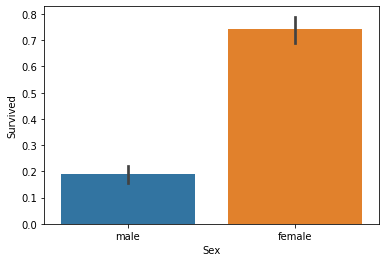

In [7]:
sns.barplot(x='Sex', y = 'Survived', data=titanic_df)

**객실 등급별 생존률 확인**
* 부를 측정할 수 있는 속성은 객실 등급일 것
* 일등실, 이등실, 삼등실에 따라 생존 확룔를 확인. 단순 객실 등급별 생존 확률보다 성별을 함께 고려해 분석하는 것이 더 효율적일 것

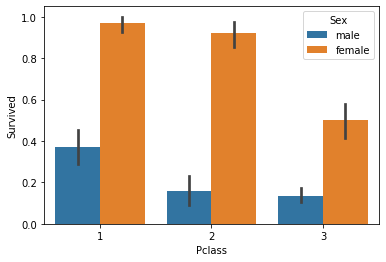

In [8]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

* 여성의 경우 일, 이등실에 따른 생존 확룰의 차이는 크지 않으나, 삼등실의 경우 생존 확률이 상대적으로 많이 떨어짐
* 남성의 경우 일등실 생존 확률이 이, 삼등실의 생존 확률보다 월등히 높음

**Age에 따른 생존 확률**
* Age의 경우 값 종류가 많기 때문에 범위별로 분류해 카테고리 값을 할당

Age | 카테고리
:---:|:--------:
0 ~ 5|Baby
6 ~ 12|Child
13 ~ 18|Teenager
19 ~ 25|Student
26 ~ 35|Young Adult
36 ~ 60|Adult
61 이상|Elderly
-1 이하|Unknown

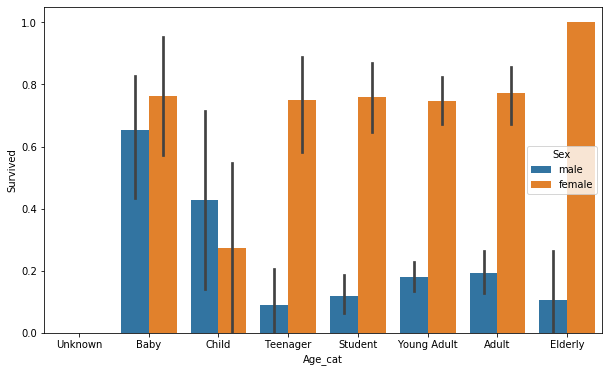

In [9]:
# 입력 age에 따라 구분값을 반환하는 함수 설정. DataFrame의 apply lambda식에 사용. 
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

# 막대그래프의 크기 figure를 더 크게 설정 
plt.figure(figsize=(10,6))

#X축의 값을 순차적으로 표시하기 위한 설정 
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정. 
# get_category(X)는 입력값으로 'Age' 컬럼값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y = 'Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

* 여자 Baby의 경우 비교적 생존 확률이 높았지만 여자 Child의 경우 다른 연령대에 비해 생존 확률이 낮음. 여자 Elderly의 경우 매우 생존 확률이 높았음

## 3. 데이터 전처리

 **문자열 카테고리 피처를 숫자형 카테고리 피처로 변환**
 * LabelEncoder 클래스를 이용해 레이블 인코딩을 적용
 * LabelEncoder 객체는 카테고리 값의 유형 수에 따라 0 ~ (카테고리 유형 수 - 1)까지의 숫자 값으로 변환됨
 사이킷런의 전처리 모듈의 대부분 인코딩 API는 사이킷런의 기본 프레임워크 API인 `fit()`, `transform()`으로 데이터를 변환
 * 여러 칼럼을 `encode_features()` 함수를 새로 생성해 한 번에 변환할 예정

In [10]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


* Sex, Cabin, Embarked 속성이 숫자형으로 바뀜

**피처 전처리 과정 함수로 만들기**
* 데이터의 전처리를 전체적으로 호출하는 함수는 `transform_features()`이며, Null 처리, 포매팅, 인코딩을 수행하는 내부 함수로 구성함

In [11]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df


**전처리 함수를 이용해 원본 데이터 가공하기**
* 원본 CSV 파일을 다시 로딩하고 타이타닉 생존자 데이터 세트의 레이블인 Survived 속성만 분리해 클래스 결정값 데이터 세트로 만듦
* Survived 속성을 드롭해 피처 데이터 세트를 만든 후 `transform_features()`를 적용해 데이터를 가공

In [12]:
# 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출. 
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived',axis=1)

X_titanic_df = transform_features(X_titanic_df)

* 학습 데이터 세트를 기반으로 `train_test_split()` API를 이용해 별도의 테스트 데이터 세트를 추출

## 4. 머신러닝 알고리즘 사용

* 결정 트리, 랜덤 포레스트, 로지스틱 회귀를 이용해 타이타닉 생존자를 예측
* 결정 트리를 위해 DecisionTreeClassifier, 랜덤 포레스트를 위해 RandomForestClassifier, 로지스틱 회귀를 위해 LogisticRegression 클래스를 제공
* 사이킷런 클래스를 이용해 train_test_split()로 분리한 학습 데이터와 테스트 데이터를 기반으로 머신러닝 모델을 학습하고, 예측할 것
* 예측 성능 평가는 정확도로 할 것이며 `accuracy_score()` API를 사용

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=11)


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))


DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도:0.8324
LogisticRegression 정확도: 0.8659


C:\Users\slc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\slc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


* LogisticRegression이 타 알고리즘에 비해 높은 정확도를 보임

**교차 검증으로 결정 트리 모델을 평가**
* model_selection 패키지의 KFold 클래스, cross_val_score(), GridSearchCV 클래스를 모두 사용

* KFold 클래스를 이용해 교차 검증을 수행
    * 평균 정확도: 약 78.23%

In [15]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한  리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차 검증 수행. 
    for iter_count , (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산 
        clf.fit(X_train, y_train) 
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))     
    
    # 5개 fold에서의 평균 정확도 계산. 
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score)) 
# exec_kfold 호출
exec_kfold(dt_clf , folds=5) 


교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


* 교차 검증을 `cross_val_score()` API를 이용해 수행
    * K 폴드 정확도가 약간 다른데, `cross_val_score()`가 StartifiedKFold를 이용해 폴드 세트를 분할하기 때문

In [16]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df , y_titanic_df , cv=5)
for iter_count,accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7765
교차 검증 2 정확도: 0.7809
교차 검증 3 정확도: 0.7753
교차 검증 4 정확도: 0.8418
평균 정확도: 0.7835


* GridSearchCV를 이용해 DecisionTreeClassifier의 최적 하이퍼 파라미터를 찾고 예측 성능을 측정
    * CV는 5개의 폴드 세트를 지정하고 하이퍼 파라미터는 `max_depth`, `min_samples_splt`, `min_samples_leaf`를 변경하면성 성능을 측정
    * 최적 하이퍼 파라미터와 그 때의 예측을 출력하고, 최적 하이퍼 파라미터로 학습된 Estimator를 이용해 위의 `train_test_split()`으로 분리된 테스트 데이터 세트에 예측을 수행해 예측 정확도를 출력

In [17]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf , param_grid=parameters , scoring='accuracy' , cv=5)
grid_dclf.fit(X_train , y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))


GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715


C:\Users\slc\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


* 최적화된 하이퍼 파라미터인 `max_depth = 3`, `min_samples_leaf = 1`, `min_samples_split = 2`로 DecisionTreeClassifier를 학습시킨 뒤 예측 정확도가 약 87.15%로 향상됨